In [253]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation
import time

In [254]:
# Constants
alpha = 10000
Ti = 300 # K
To = 10 # K
# k = 20 # W/mK
L = 100 # m 
node = 100
intervall = node + 1
delta_x = L/(intervall)
max_iter_time = 10000

# Calculated Parameters
delta_t = (delta_x ** 2)/(4 * alpha + 1)
gamma = (alpha * delta_t) / (delta_x ** 2)

In [255]:
temperature_array = np.zeros(node+2)
temperature_array[0] = Ti
temperature_array[-1] = To
temperature_array

array([300.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,  10.])

In [256]:
temperature_matrix = np.zeros((max_iter_time, node + 2))
temperature_matrix[:,:] = 10
temperature_matrix[:,0] = Ti
temperature_matrix[:,-1] = To
temperature_matrix

array([[300.,  10.,  10., ...,  10.,  10.,  10.],
       [300.,  10.,  10., ...,  10.,  10.,  10.],
       [300.,  10.,  10., ...,  10.,  10.,  10.],
       ...,
       [300.,  10.,  10., ...,  10.,  10.,  10.],
       [300.,  10.,  10., ...,  10.,  10.,  10.],
       [300.,  10.,  10., ...,  10.,  10.,  10.]])

In [257]:
temperature_matrix.shape

(10000, 102)

In [258]:
for t in range(temperature_matrix.shape[0] - 1):
  for i in range(1, temperature_matrix.shape[1] - 1):
    temperature_matrix[t+1, i] = gamma * (temperature_matrix[t, i + 1] + temperature_matrix[t, i - 1] - 2 * temperature_matrix[t, i]) + temperature_matrix[t, i]


In [259]:
temperature_matrix[-1]

array([300.        , 296.61711096, 293.23471791, 289.85331635,
       286.47340082, 283.0954644 , 279.71999824, 276.34749111,
       272.97842884, 269.61329395, 266.2525651 , 262.89671667,
       259.54621826, 256.20153428, 252.86312344, 249.53143836,
       246.2069251 , 242.89002271, 239.58116284, 236.28076929,
       232.98925764, 229.70703478, 226.43449858, 223.17203745,
       219.92003002, 216.67884471, 213.44883943, 210.2303612 ,
       207.02374582, 203.82931755, 200.64738881, 197.47825984,
       194.32221846, 191.17953974, 188.05048579, 184.93530547,
       181.83423415, 178.74749351, 175.67529133, 172.61782124,
       169.5752626 , 166.5477803 , 163.53552459, 160.53863097,
       157.55722003, 154.59139736, 151.64125345, 148.70686359,
       145.7882878 , 142.88557082, 139.99874202, 137.12781537,
       134.2727895 , 131.43364761, 128.61035759, 125.80287196,
       123.01112799, 120.23504772, 117.47453809, 114.72949097,
       111.9997833 , 109.28527725, 106.58582028, 103.90

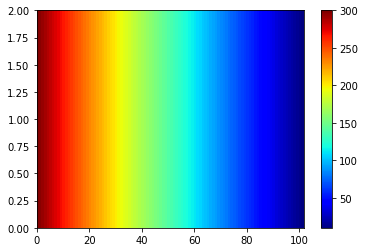

In [260]:
plt.pcolormesh([temperature_matrix[-4],temperature_matrix[-4]], cmap=plt.cm.jet, vmin=10, vmax=300)
plt.colorbar()

Done!


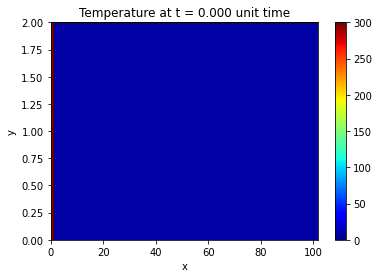

In [261]:
def plotheatmap(u_k, k):
    # Clear the current plot figure
    plt.clf()

    plt.title(f"Temperature at t = {k*delta_t:.3f} unit time")
    plt.xlabel("x")
    plt.ylabel("y")

    # This is to plot u_k (u at time-step k)
    plt.pcolormesh([u_k,u_k], cmap=plt.cm.jet, vmin=0, vmax=300)
    plt.colorbar()

    return plt

def animate(k):
    plotheatmap(temperature_matrix[k], k)


anim = animation.FuncAnimation(plt.figure(), animate, interval=1, frames=max_iter_time, repeat=False)
anim.save("fsdfadf.mp4")
print("Done!")